# Importing packages and loading the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
import random
from numpy.linalg import norm

In [2]:
data=pd.read_csv('AI ML/Advertising Dataset.csv')

# looking at the first five lines

In [3]:
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
Unnamed: 0    200 non-null int64
TV            200 non-null float64
radio         200 non-null float64
newspaper     200 non-null float64
sales         200 non-null float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [5]:
data.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [6]:
data.isnull().sum()#checking for nan values

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

In [7]:
data.corr()#checking correlation between features
#from this we might say that TV feature is most important as its correlation with sales is highest

,Unnamed: 0,TV,radio,newspaper,sales
Unnamed: 0,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV,0.017715,1.000000,0.054809,0.056648,0.782224
radio,-0.110680,0.054809,1.000000,0.354104,0.576223
newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299
sales,-0.051616,0.782224,0.576223,0.228299,1.000000


# Random spliting into test and train

In [8]:
test=np.array(data)

In [9]:
test.shape#length is 200 so 75% is 150

(200, 5)

In [10]:
random.seed(500)
train=[]
for i in range(150):
    n=random. randint(0,test.shape[0]-1)#random number
    train.append(test[n])
    test = np.delete(test,n, axis=0)
train=np.array(train)

In [11]:
train.shape

(150, 5)

In [12]:
np.unique(test[:,0])#checking Unnamed values of test

array([ 13.,  21.,  26.,  27.,  30.,  31.,  33.,  36.,  37.,  42.,  46.,
        48.,  51.,  53.,  60.,  63.,  67.,  72.,  74.,  75.,  77.,  78.,
        79.,  80.,  81.,  85.,  87.,  91., 101., 103., 107., 108., 126.,
       139., 142., 146., 149., 154., 163., 164., 170., 175., 177., 181.,
       183., 187., 190., 193., 197., 199.])

In [13]:
np.unique(train[:,0])#checking Unnamed values of train

array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  22.,  23.,  24.,
        25.,  28.,  29.,  32.,  34.,  35.,  38.,  39.,  40.,  41.,  43.,
        44.,  45.,  47.,  49.,  50.,  52.,  54.,  55.,  56.,  57.,  58.,
        59.,  61.,  62.,  64.,  65.,  66.,  68.,  69.,  70.,  71.,  73.,
        76.,  82.,  83.,  84.,  86.,  88.,  89.,  90.,  92.,  93.,  94.,
        95.,  96.,  97.,  98.,  99., 100., 102., 104., 105., 106., 109.,
       110., 111., 112., 113., 114., 115., 116., 117., 118., 119., 120.,
       121., 122., 123., 124., 125., 127., 128., 129., 130., 131., 132.,
       133., 134., 135., 136., 137., 138., 140., 141., 143., 144., 145.,
       147., 148., 150., 151., 152., 153., 155., 156., 157., 158., 159.,
       160., 161., 162., 165., 166., 167., 168., 169., 171., 172., 173.,
       174., 176., 178., 179., 180., 182., 184., 185., 186., 188., 189.,
       191., 192., 194., 195., 196., 198., 200.])

# Using our own linear regression

In [14]:
train=np.delete(train, 0, axis=1)#dropping Unnamed values 
test=np.delete(test, 0, axis=1)#dropping Unnamed values 

In [15]:
train_x=train[:,0:-1]
train_y=train[:,-1]
test_x=test[:,0:-1]
test_y=test[:,-1]

In [16]:
train_y=np.expand_dims(train_y, axis=1)
test_y=np.expand_dims(test_y, axis=1)

In [17]:
x_mean=np.mean(train_x,axis=0)
y_mean=np.mean(train_y,axis=0)
inv_term=np.dot((train_x-x_mean).transpose(),(train_x-x_mean))
inv_term=np.linalg.inv(inv_term)
second_term=np.dot((train_x-x_mean).transpose(),(train_y-y_mean))
w=np.dot(inv_term,second_term)
b=y_mean-np.dot(w.transpose(),x_mean)

In [18]:
w

array([[ 0.04784322],
       [ 0.18657822],
       [-0.00292762]])

In [19]:
b

array([2.70054552])

# Checking the result with LinearRegression from sklearn library

In [20]:
reg = LinearRegression().fit(train_x, train_y)

In [21]:
reg.intercept_#we have a 100% match of bias

array([2.70054552])

In [22]:
reg.coef_#we have a 100% match of weights

array([[ 0.04784322,  0.18657822, -0.00292762]])

# Calculating MSE on test set

In [23]:
y_pred=w[0]*test_x[:,0]+w[1]*test_x[:,1]+w[2]*test_x[:,2]+b
y_pred=np.expand_dims(y_pred, axis=1)

In [24]:
MSE=np.square(test_y-y_pred).mean()

In [25]:
MSE#USING OUR ALGORITHM

2.8015694949682564

In [26]:
Y=reg.predict(test_x)

In [27]:
MSE=np.square(test_y-Y).mean()

In [28]:
MSE#USING SKLEARN

2.8015694949682572

# Ridge Regression

In [29]:
l_w1=[]
l_w2=[]
l_w3=[]
l_b=[]
l_MSE=[]
lamb=[]
l2_norm=[]
for i in [0.5, 1, 5, 10, 50, 100]:
    l=i
    lamb.append(l)
    x_mean=np.mean(train_x,axis=0)
    y_mean=np.mean(train_y,axis=0)
    inv_term=np.dot((train_x-x_mean).transpose(),(train_x-x_mean))+l*np.identity(3, dtype = float)
    inv_term=np.linalg.inv(inv_term)
    second_term=np.dot((train_x-x_mean).transpose(),(train_y-y_mean))
    w=np.dot(inv_term,second_term)
    b=y_mean-np.dot(w.transpose(),x_mean)
    l_w1.append(w[0].tolist())
    l_w2.append(w[1].tolist())
    l_w3.append(w[2].tolist())
    l_b.append(b)
    l2_norm.append(norm(w))
    y_pred=w[0]*test_x[:,0]+w[1]*test_x[:,1]+w[2]*test_x[:,2]+b
    y_pred=np.expand_dims(y_pred, axis=1)
    MSE=np.square(test_y-y_pred).mean()
    l_MSE.append(MSE)


# PLOTTING GRAPHS

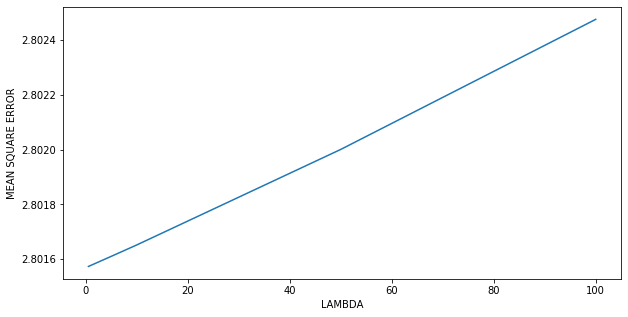

In [30]:
plt.figure(figsize=(10,5))
plt. plot(lamb, l_MSE, label = "MSE")
plt. xlabel('LAMBDA')
plt. ylabel('MEAN SQUARE ERROR')
plt.show()

In [31]:
#CONVERTING TO TUPLE FOR BAR PLOTS
q=[]
y=[]
z=[]
for i in l_w1:
    q.append(i[0])
for i in l_w2:
    y.append(i[0])
for i in l_w3:
    z.append(i[0])
q=tuple(q)
y=tuple(y)
z=tuple(z)

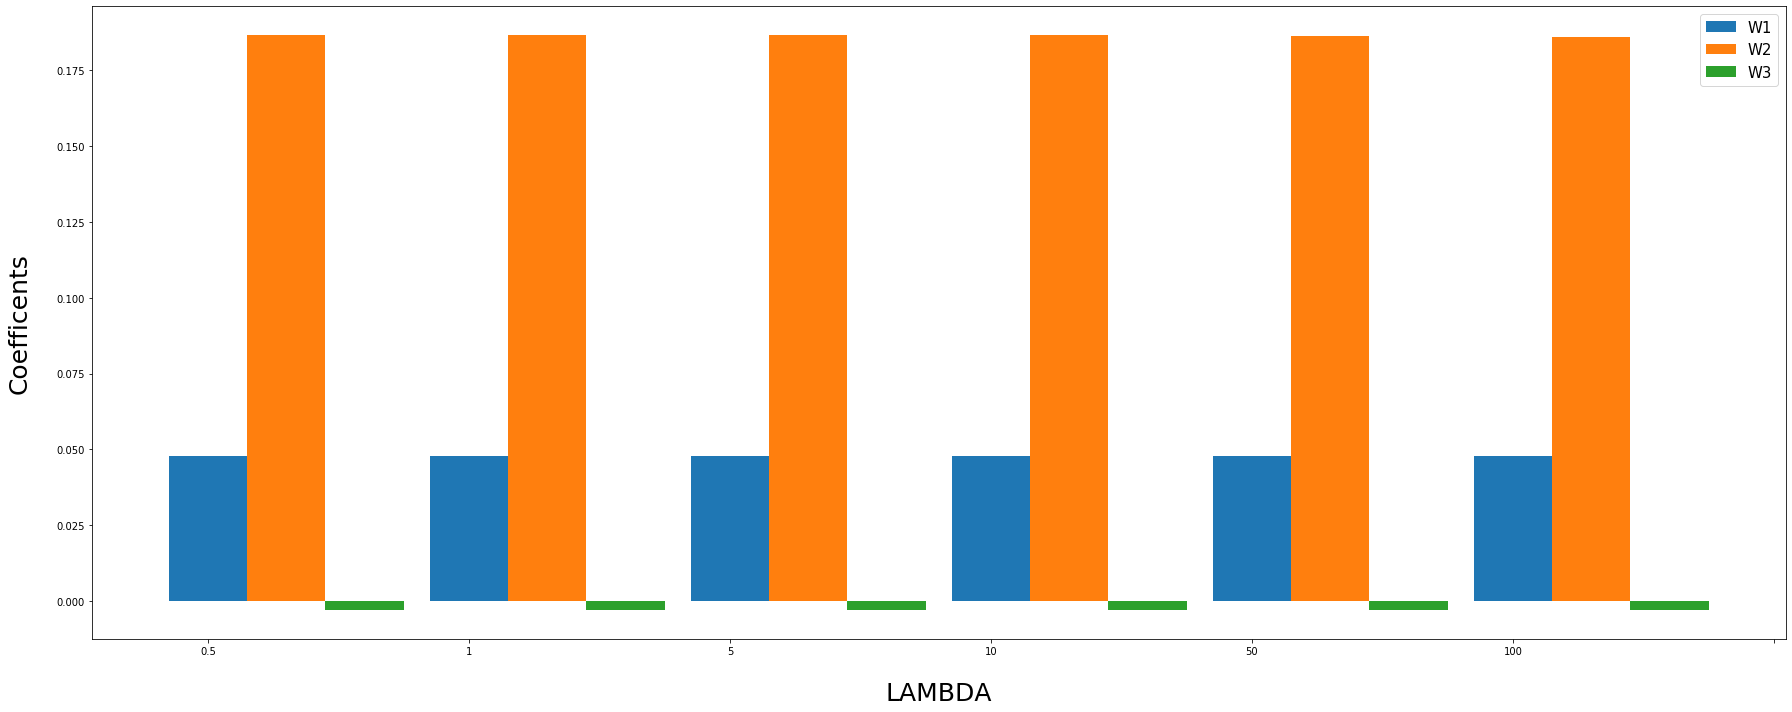

In [32]:
fig, ax = plt.subplots(figsize=(25, 10))
x = np.arange(len(l_w1))
bar_width = 0.3
b1 = ax.bar(x, q,width=bar_width,label='W1')
b2 = ax.bar(x + bar_width, y,width=bar_width,label='W2')
b2 = ax.bar(x + 2*bar_width, z,width=bar_width,label='W3')
ax.set_xticklabels(('X','0.5', '1', '5', '10', '50', '100'))
ax.set_xlabel('LAMBDA', labelpad=25,fontsize=25)
ax.set_ylabel('Coefficents', labelpad=25,fontsize=25)
fig.tight_layout()
ax.legend(fontsize=15)
plt.show()

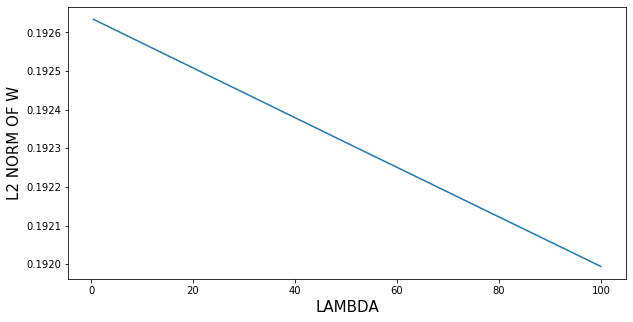

In [33]:
plt.figure(figsize=(10,5))
plt.plot(lamb,l2_norm)
plt. xlabel('LAMBDA',fontsize=15)
plt. ylabel('L2 NORM OF W',fontsize=15)
plt.show()

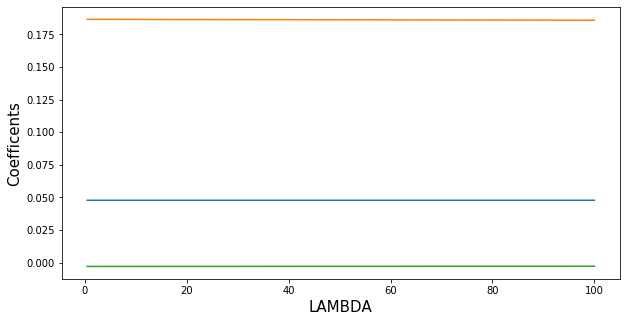

In [34]:
plt.figure(figsize=(10,5))
plt.plot(lamb,l_w1)
plt.plot(lamb,l_w2)
plt.plot(lamb,l_w3)
plt. xlabel('LAMBDA',fontsize=15)
plt. ylabel('Coefficents',fontsize=15)
plt.show()

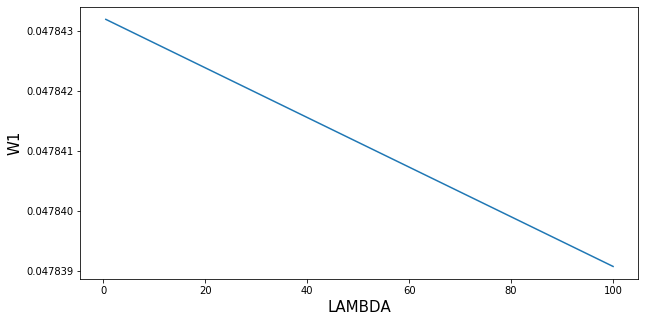

In [35]:
plt.figure(figsize=(10,5))
plt.plot(lamb,l_w1)
plt. xlabel('LAMBDA',fontsize=15)
plt. ylabel('W1',fontsize=15)
plt.show()

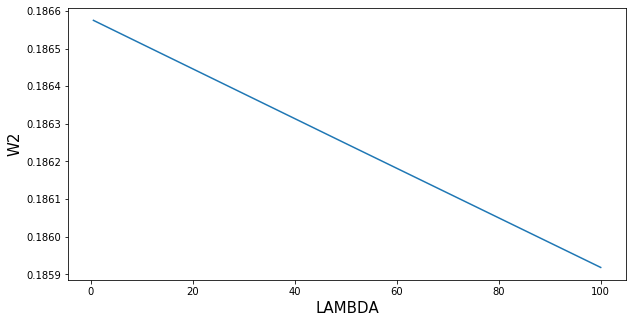

In [36]:
plt.figure(figsize=(10,5))
plt.plot(lamb,l_w2)
plt. xlabel('LAMBDA',fontsize=15)
plt. ylabel('W2',fontsize=15)
plt.show()

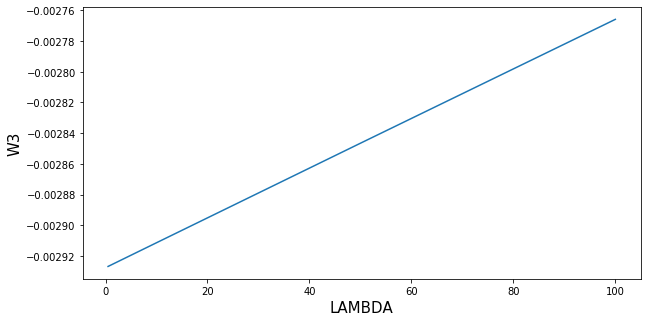

In [37]:
plt.figure(figsize=(10,5))
plt.plot(lamb,l_w3)
plt. xlabel('LAMBDA',fontsize=15)
plt. ylabel('W3',fontsize=15)
plt.show()

# Lasso regression

In [38]:
coeff=[]
lamb=[]
for i in range(1,1000):
    l=i/10
    lamb.append(l)
    clf = linear_model.Lasso(alpha=l)
    clf.fit(train_x,train_y)
    if (clf.coef_[0]==0 and clf.coef_[1]==0) or (clf.coef_[1]==0 and clf.coef_[2]==0) or (clf.coef_[0]==0 and clf.coef_[2]==0):
        print(clf.coef_)
        coeff.append(clf.coef_)
        break
    coeff.append(clf.coef_)
    

[0.04298322 0.         0.        ]


In [39]:
coeff=np.array(coeff)

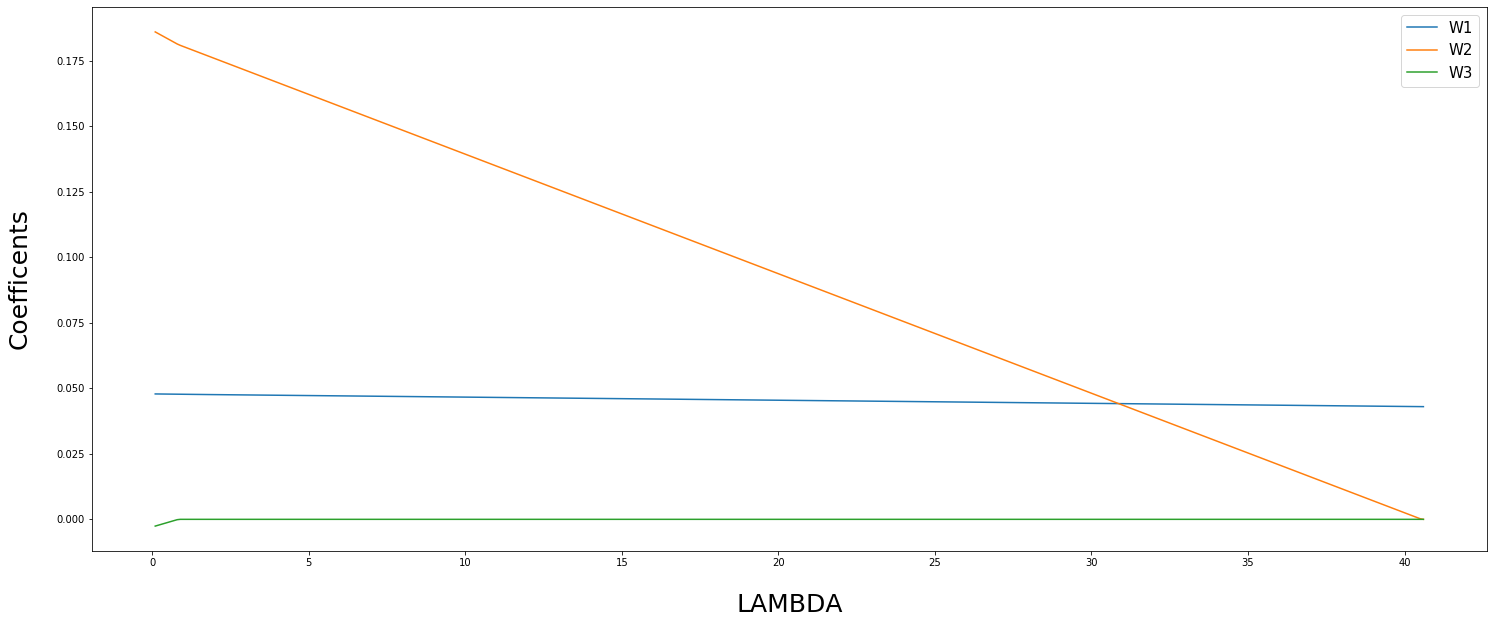

In [40]:
fig, ax = plt.subplots(figsize=(25, 10))
plt.plot(lamb,coeff[:,0],label='W1')
plt.plot(lamb,coeff[:,1],label='W2')
plt.plot(lamb,coeff[:,2],label='W3')
ax.set_xlabel('LAMBDA', labelpad=25,fontsize=25)
ax.set_ylabel('Coefficents', labelpad=25,fontsize=25)
ax.legend(fontsize=15)
plt.show()

W1 is furthest from 0 hence TV is most important feature.We can also see this from the correlation chart as TV has the highest correlation with the target